In [80]:
def to_rad(deg):
    return deg * (np.pi / 180)

def to_deg(rad):
    return rad / (np.pi / 180)

import matplotlib.pyplot as plt
import numpy             as np
import csv
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

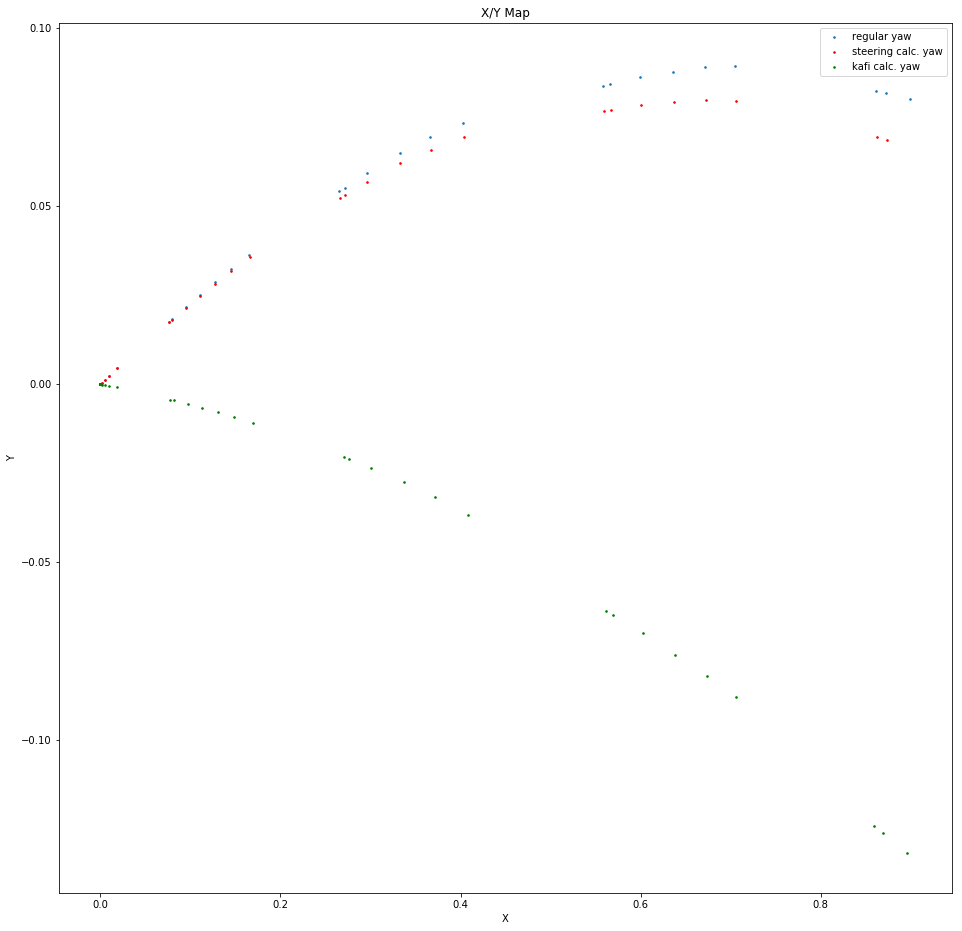

In [106]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])
    y_list = np.array([])

    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            x = row[0]
            y = row[1]
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)           
    return x_list, y_list

normal_x_list, normal_y_list = read_csv('../../build/normal-yaw-pos.csv')
steer_x_list, steer_y_list = read_csv('../../build/steer-yaw-pos.csv')
kafi_x_list, kafi_y_list = read_csv('../../build/kafi-yaw-pos.csv')

fig, ax = plt.subplots(figsize=(16,16))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X/Y Map")

cut = 300

ax.scatter(normal_x_list[:cut], normal_y_list[:cut], s = 2.5, label = 'regular yaw')
ax.scatter(steer_x_list[:cut], steer_y_list[:cut], s = 2.5, color = 'red', label = 'steering calc. yaw')
ax.scatter(kafi_x_list[:cut], kafi_y_list[:cut], s = 2.5, color = 'green', label = 'kafi calc. yaw')


plt.legend()
plt.show()

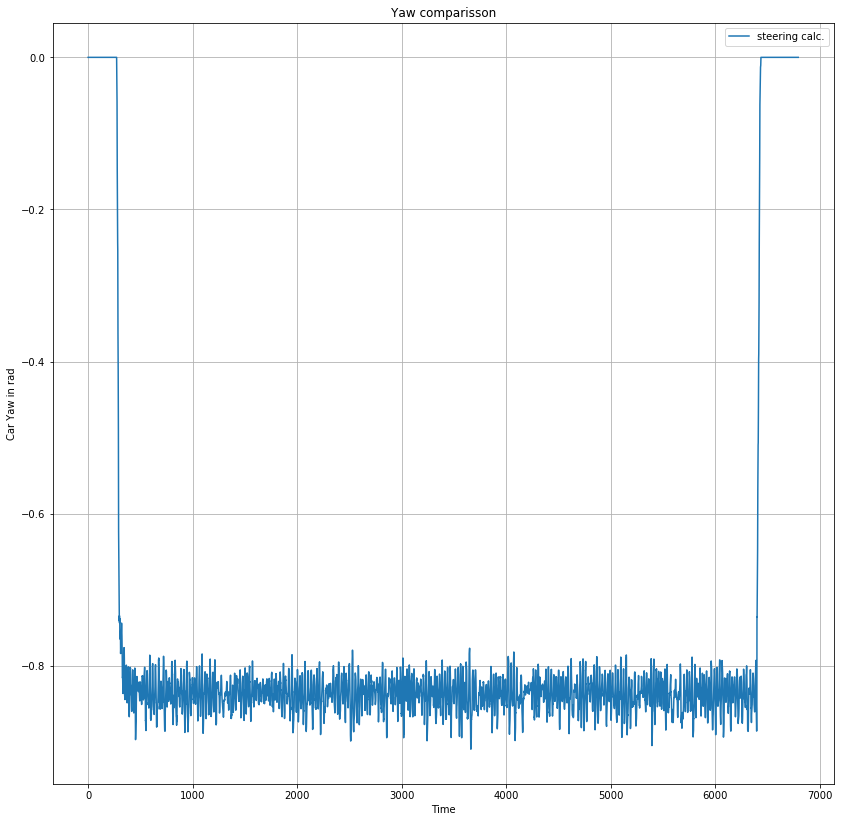

In [115]:
def read_csv(path):
    '''
    '''

    normal_yaw_list = np.array([])
    steer_yaw_list = np.array([])
    kafi_yaw_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            normal_yaw = row[0]
            steer_yaw  = row[1]
            kafi_yaw   = row[2]
            normal_yaw_list = np.append(normal_yaw_list, normal_yaw)
            steer_yaw_list = np.append(steer_yaw_list, steer_yaw)
            kafi_yaw_list = np.append(kafi_yaw_list, kafi_yaw)
            
    return normal_yaw_list, steer_yaw_list, kafi_yaw_list


normal_yaw_list, steer_yaw_list, kafi_yaw_list = read_csv('../../build/yaws.csv')

fig, ax = plt.subplots(figsize=(14,14))

ax.set_xlabel('Time')
ax.set_ylabel('Car Yaw in rad')
ax.set_title("Yaw comparisson")

#plt.plot(normal_yaw_list, label='bosch')
plt.plot(steer_yaw_list, label='steering calc.')
#plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()

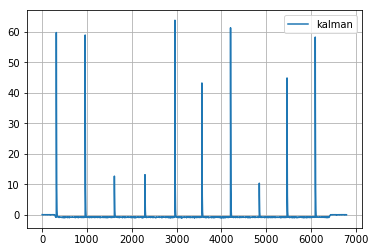

In [116]:
plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()